In [2]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets


import warnings
warnings.simplefilter('ignore')

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.grid'] = True

np.set_printoptions(suppress=True, precision=5)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

n_output = len(list(set(classes)))
print(n_output)

torch.manual_seed(123)
inputs = torch.randn(1, 10)
print(inputs)

dropout = nn.Dropout(0.5)
dropout.train()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)
dropout.eval()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

!git clone https://github.com/makaishi2/pythonlibs.git

from pythonlibs.torch_lib1 import *
print(README)

cuda:0
10
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])
True
tensor([[-0.0000,  0.2407, -0.7393, -0.4808, -2.3938,  0.4185, -0.0000, -1.5101,
          0.0000, -0.2170]])
False
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])
Cloning into 'pythonlibs'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 112 (delta 0), reused 2 (delta 0), pack-reused 108 (from 1)
Receiving objects: 100% (112/112), 21.12 MiB | 22.04 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Common Library for PyTorch
Author: M. Akaishi


100%|██████████| 170M/170M [00:05<00:00, 30.8MB/s]


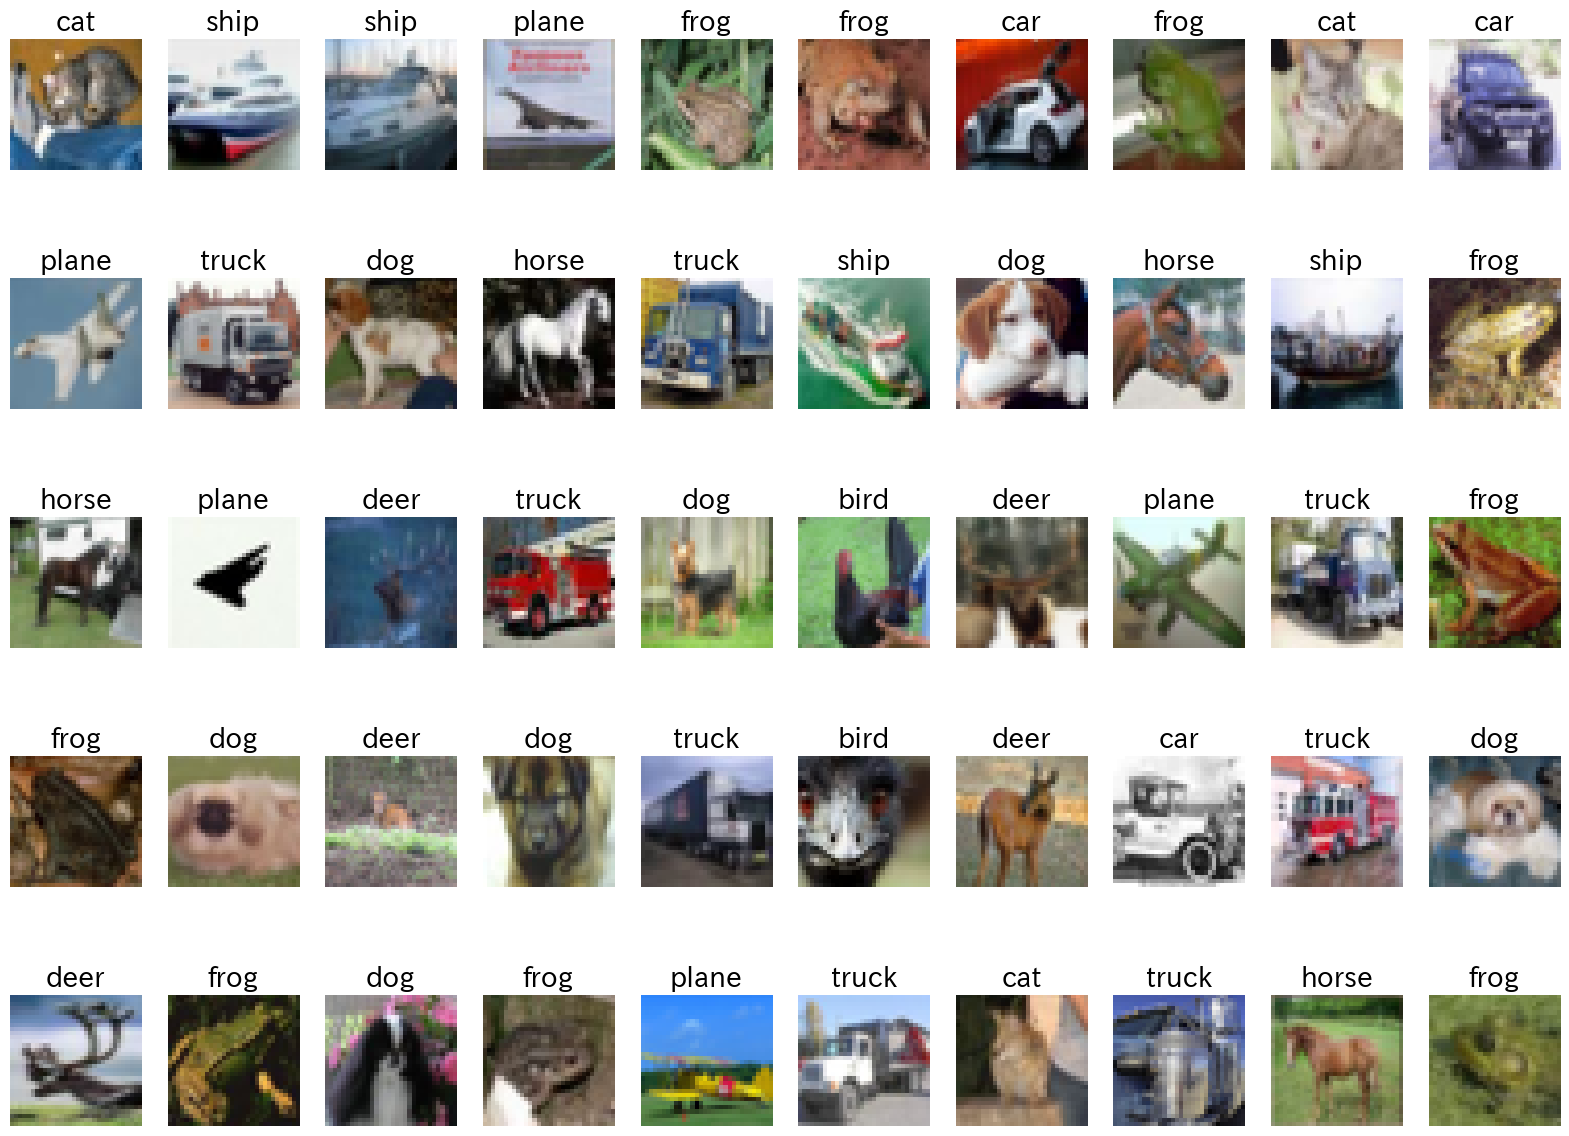

In [3]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

data_root = './data'

train_set = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform)

test_set = datasets.CIFAR10(
    root = data_root, train = False,
    download = True, transform = transform)

batch_size = 100

train_loader = DataLoader(train_set,
    batch_size = batch_size, shuffle = True)

test_loader = DataLoader(test_set,
    batch_size = batch_size, shuffle = False)

show_images_labels(test_loader, classes, None, None)


In [ ]:
class CNN_v2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

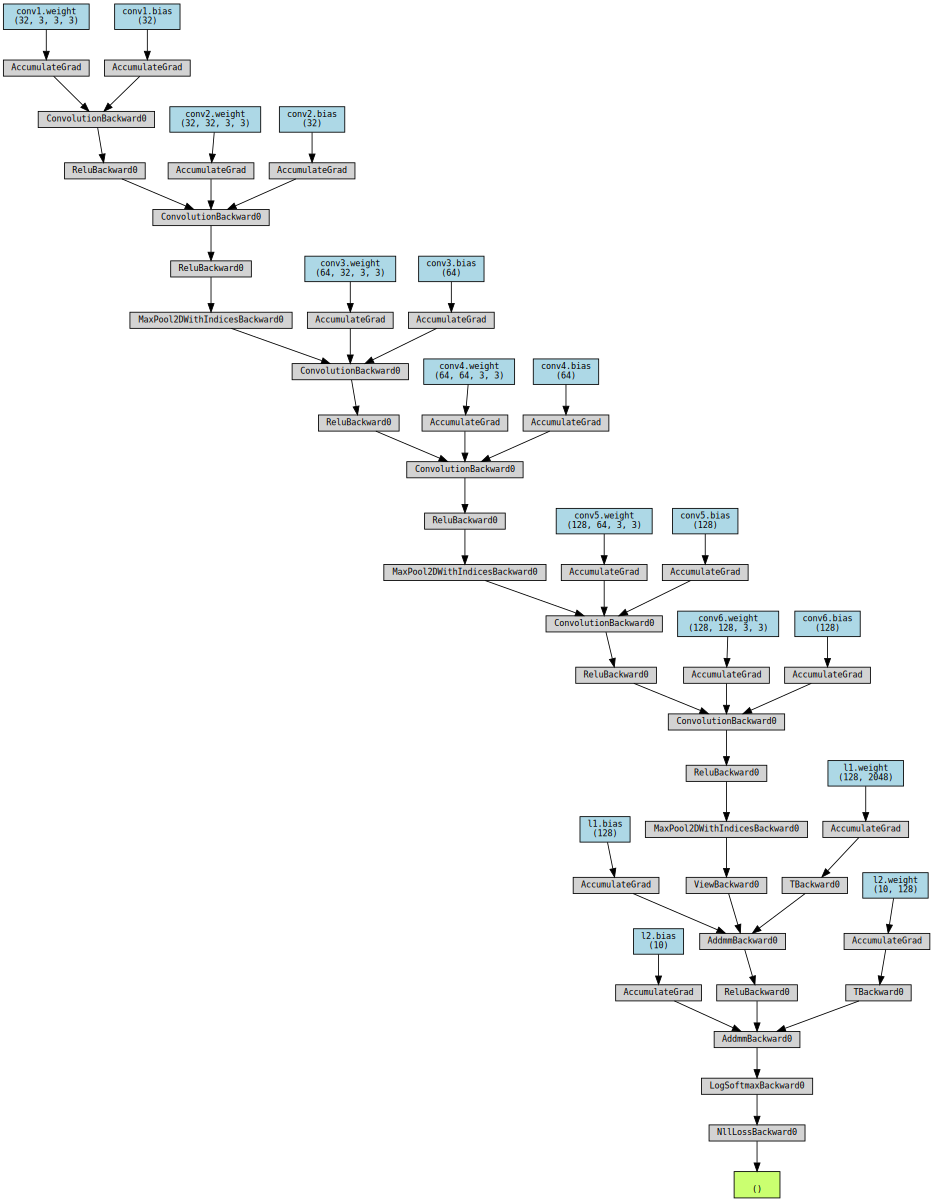

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 2.30313 acc: 0.10000 val_loss: 2.30278, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 2.30268 acc: 0.10000 val_loss: 2.30252, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 2.30248 acc: 0.10000 val_loss: 2.30234, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 2.30228 acc: 0.10842 val_loss: 2.30210, val_acc: 0.10160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 2.30196 acc: 0.13020 val_loss: 2.30164, val_acc: 0.17490


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 2.30118 acc: 0.16744 val_loss: 2.30032, val_acc: 0.19090


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 2.29810 acc: 0.18534 val_loss: 2.29355, val_acc: 0.21840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 2.24531 acc: 0.21894 val_loss: 2.09668, val_acc: 0.23850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 2.01619 acc: 0.26136 val_loss: 1.94566, val_acc: 0.29280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 1.90655 acc: 0.31244 val_loss: 1.89595, val_acc: 0.31240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 1.79666 acc: 0.35096 val_loss: 1.69915, val_acc: 0.38700


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 1.69686 acc: 0.38340 val_loss: 1.62423, val_acc: 0.41320


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 1.62926 acc: 0.40570 val_loss: 1.56211, val_acc: 0.42750


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 1.57492 acc: 0.42074 val_loss: 1.62891, val_acc: 0.41230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 1.53035 acc: 0.43778 val_loss: 1.50181, val_acc: 0.44510


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 1.48190 acc: 0.45806 val_loss: 1.44045, val_acc: 0.47300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 1.44151 acc: 0.47408 val_loss: 1.39953, val_acc: 0.48460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 1.39972 acc: 0.49416 val_loss: 1.43110, val_acc: 0.48670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 1.35494 acc: 0.51292 val_loss: 1.34555, val_acc: 0.51320


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 1.31050 acc: 0.53178 val_loss: 1.29421, val_acc: 0.53080


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 1.25875 acc: 0.54954 val_loss: 1.23285, val_acc: 0.55450


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 1.21730 acc: 0.56670 val_loss: 1.20886, val_acc: 0.56560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 1.17468 acc: 0.58280 val_loss: 1.19549, val_acc: 0.57760


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 1.14183 acc: 0.59512 val_loss: 1.15926, val_acc: 0.58340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 1.09726 acc: 0.61066 val_loss: 1.12993, val_acc: 0.59690


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 1.06092 acc: 0.62542 val_loss: 1.10003, val_acc: 0.61150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 1.02150 acc: 0.64038 val_loss: 1.12401, val_acc: 0.60440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.98475 acc: 0.65390 val_loss: 1.04566, val_acc: 0.63730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.95484 acc: 0.66640 val_loss: 1.01175, val_acc: 0.64500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.91603 acc: 0.68074 val_loss: 0.97626, val_acc: 0.65550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.88413 acc: 0.69104 val_loss: 0.97491, val_acc: 0.65960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.85572 acc: 0.69934 val_loss: 0.94361, val_acc: 0.67120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.82212 acc: 0.71408 val_loss: 0.99640, val_acc: 0.65520


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.79297 acc: 0.72452 val_loss: 0.91799, val_acc: 0.68550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.75973 acc: 0.73568 val_loss: 0.93603, val_acc: 0.67870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.73221 acc: 0.74358 val_loss: 0.93078, val_acc: 0.68360


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.70339 acc: 0.75580 val_loss: 0.94628, val_acc: 0.68550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.67124 acc: 0.76670 val_loss: 0.91858, val_acc: 0.69210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.63996 acc: 0.77762 val_loss: 0.92592, val_acc: 0.69580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.61462 acc: 0.78578 val_loss: 0.92381, val_acc: 0.69270


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.58608 acc: 0.79684 val_loss: 0.97872, val_acc: 0.68970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.55826 acc: 0.80572 val_loss: 0.94343, val_acc: 0.70040


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.52444 acc: 0.81720 val_loss: 0.92617, val_acc: 0.70350


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.49542 acc: 0.82688 val_loss: 0.93865, val_acc: 0.70700


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.46851 acc: 0.83560 val_loss: 1.03106, val_acc: 0.68850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.43724 acc: 0.84776 val_loss: 1.07958, val_acc: 0.68720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.40610 acc: 0.85770 val_loss: 1.00623, val_acc: 0.70020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.37267 acc: 0.87120 val_loss: 1.06360, val_acc: 0.69720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.34845 acc: 0.87620 val_loss: 1.06349, val_acc: 0.70050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.31679 acc: 0.88826 val_loss: 1.09408, val_acc: 0.70050
初期状態: 損失: 2.30278 精度: 0.10000
最終状態: 損失: 1.09408 精度: 0.70050


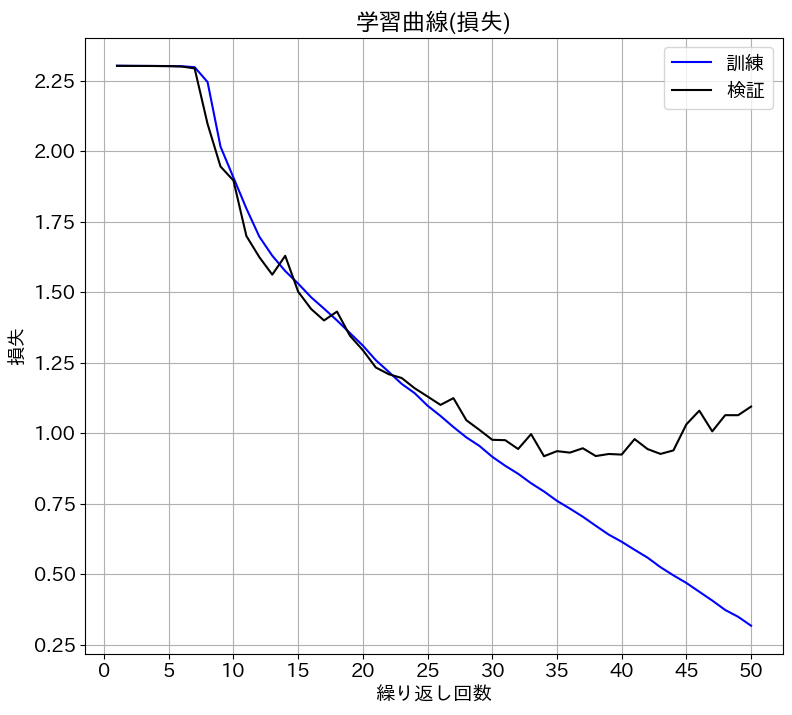

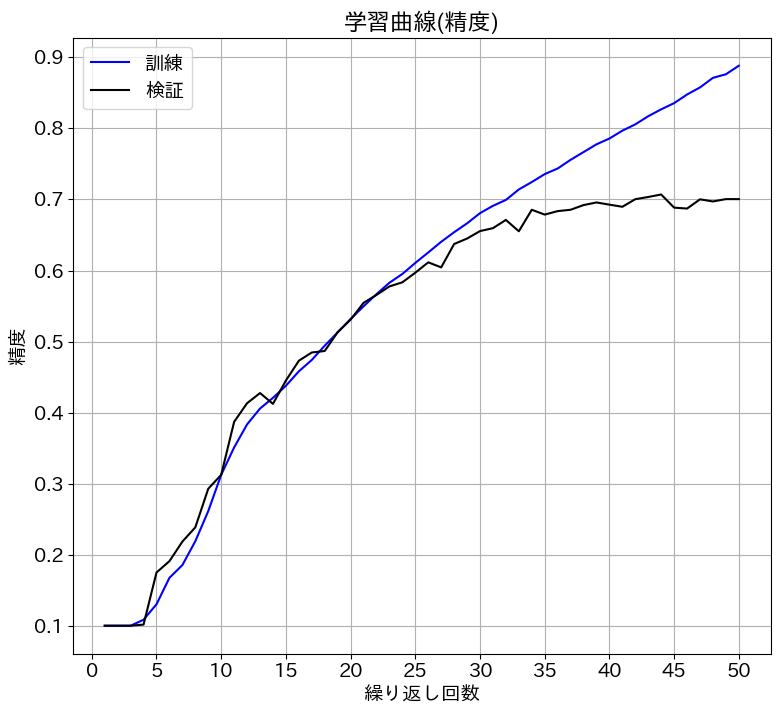

In [ ]:
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

torch_seed()

lr = 0.01

net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history = np.zeros((0, 5))
num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

evaluate_history(history)


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/20], loss: 2.28192 acc: 0.12356 val_loss: 2.03596, val_acc: 0.25550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/20], loss: 1.79390 acc: 0.33882 val_loss: 1.52949, val_acc: 0.42480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/20], loss: 1.40740 acc: 0.48354 val_loss: 1.28802, val_acc: 0.53760


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/20], loss: 1.15759 acc: 0.58278 val_loss: 1.07895, val_acc: 0.61900


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.96715 acc: 0.65672 val_loss: 0.90310, val_acc: 0.68480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.81882 acc: 0.71030 val_loss: 0.83606, val_acc: 0.70810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.68436 acc: 0.75782 val_loss: 0.75007, val_acc: 0.73810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.57587 acc: 0.79772 val_loss: 0.73720, val_acc: 0.74440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.49238 acc: 0.82884 val_loss: 0.71483, val_acc: 0.75600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.41454 acc: 0.85406 val_loss: 0.73684, val_acc: 0.76150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.33941 acc: 0.88044 val_loss: 0.78253, val_acc: 0.76290


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.27646 acc: 0.90096 val_loss: 0.85676, val_acc: 0.75180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.22172 acc: 0.92000 val_loss: 0.88522, val_acc: 0.76520


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.19207 acc: 0.93242 val_loss: 0.91217, val_acc: 0.75850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.15489 acc: 0.94572 val_loss: 1.03348, val_acc: 0.76060


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.14141 acc: 0.94934 val_loss: 1.11793, val_acc: 0.75650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.12300 acc: 0.95630 val_loss: 1.18873, val_acc: 0.76160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.10680 acc: 0.96246 val_loss: 1.20443, val_acc: 0.75660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.09774 acc: 0.96554 val_loss: 1.26173, val_acc: 0.75930


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.08978 acc: 0.96872 val_loss: 1.27675, val_acc: 0.75850
初期状態: 損失: 2.03596 精度: 0.25550
最終状態: 損失: 1.27675 精度: 0.75850


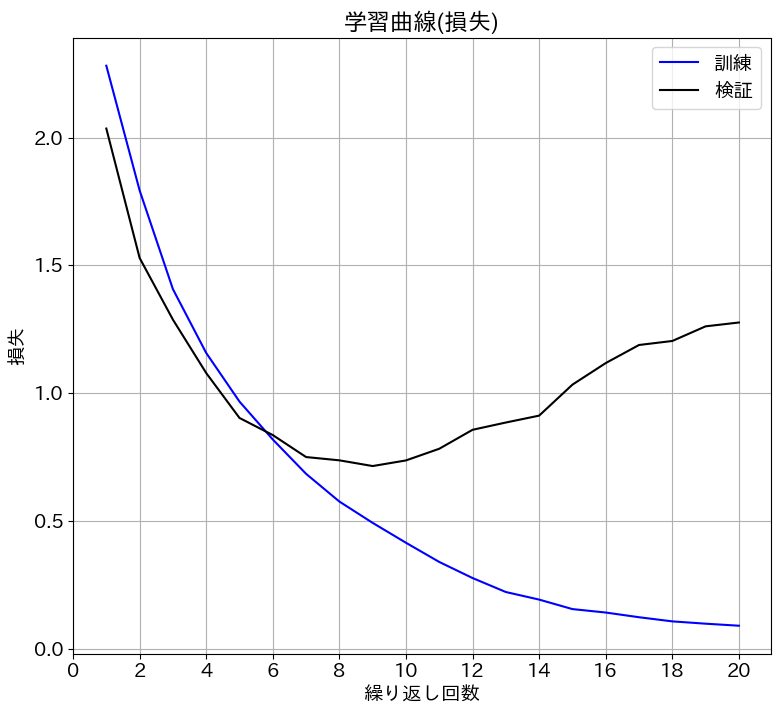

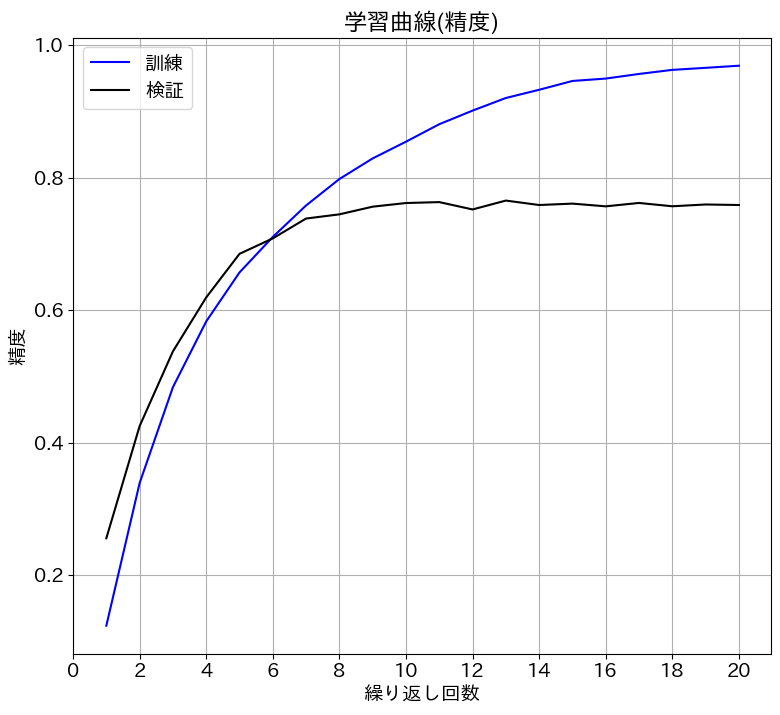

In [ ]:
torch_seed()

lr = 0.01

net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
history2 = np.zeros((0, 5))

num_epochs = 20
history2 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history2)

evaluate_history(history2)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/20], loss: 1.59297 acc: 0.41400 val_loss: 1.23411, val_acc: 0.55260


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/20], loss: 1.08900 acc: 0.60666 val_loss: 0.97970, val_acc: 0.65550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.86619 acc: 0.69366 val_loss: 0.87748, val_acc: 0.69750


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.70909 acc: 0.74882 val_loss: 0.77592, val_acc: 0.73390


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.59738 acc: 0.78848 val_loss: 0.74021, val_acc: 0.74740


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.51837 acc: 0.81796 val_loss: 0.72215, val_acc: 0.76350


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.43426 acc: 0.84580 val_loss: 0.69657, val_acc: 0.77190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.35836 acc: 0.87262 val_loss: 0.72010, val_acc: 0.77580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.28912 acc: 0.89706 val_loss: 0.74246, val_acc: 0.77870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.23549 acc: 0.91670 val_loss: 0.89937, val_acc: 0.76600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.19056 acc: 0.93262 val_loss: 0.91130, val_acc: 0.77380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.16578 acc: 0.94050 val_loss: 1.05672, val_acc: 0.77830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.13648 acc: 0.95030 val_loss: 1.09553, val_acc: 0.77440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.12814 acc: 0.95424 val_loss: 1.17313, val_acc: 0.76720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.11436 acc: 0.95896 val_loss: 1.17754, val_acc: 0.77050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.09852 acc: 0.96574 val_loss: 1.21585, val_acc: 0.76960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.09511 acc: 0.96626 val_loss: 1.29511, val_acc: 0.76820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.09275 acc: 0.96694 val_loss: 1.34196, val_acc: 0.77060


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.08771 acc: 0.96956 val_loss: 1.37961, val_acc: 0.76160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.08784 acc: 0.96932 val_loss: 1.44570, val_acc: 0.76310
初期状態: 損失: 1.23411 精度: 0.55260
最終状態: 損失: 1.44570 精度: 0.76310


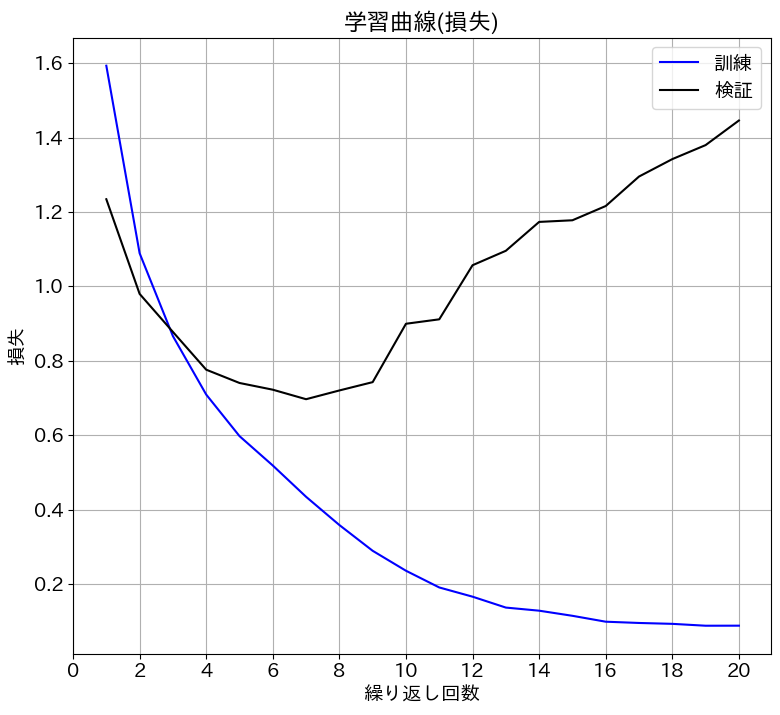

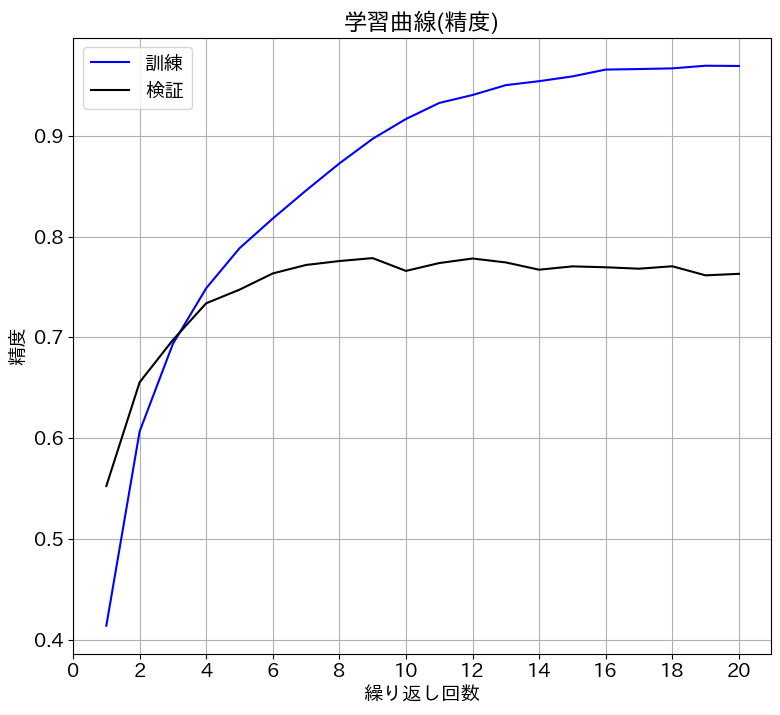

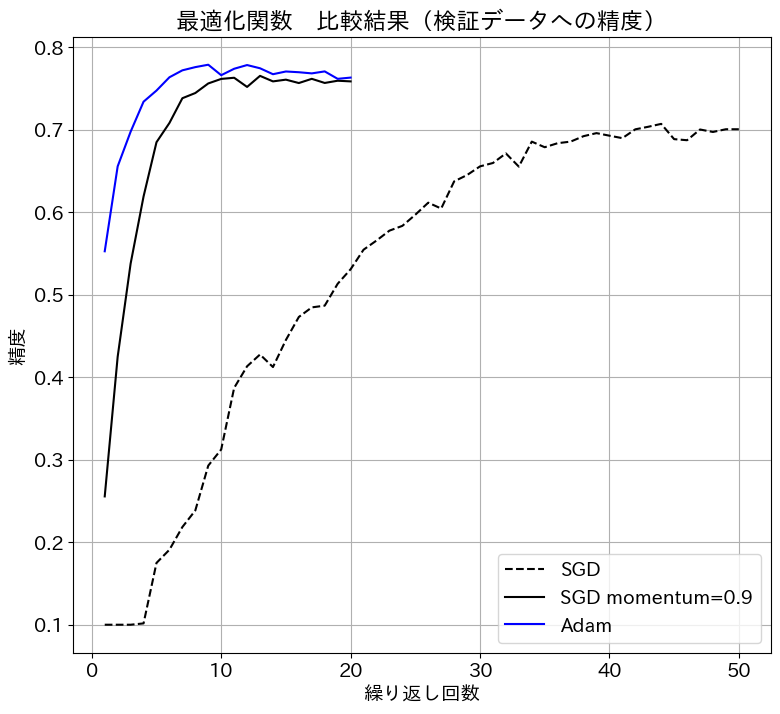

In [ ]:
torch_seed()

net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history3 = np.zeros((0, 5))

print(optimizer)

num_epochs = 20
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

evaluate_history(history3)

plt.figure(figsize=(9,8))
plt.plot(history[:,0], history[:,4], label='SGD', c='k',ls='dashed' )
plt.plot(history2[:,0], history2[:,4], label='SGD momentum=0.9', c='k')
plt.plot(history3[:,0], history3[:,4], label='Adam', c='b')
plt.title('最適化関数　比較結果（検証データへの精度）')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.legend()
plt.show()

In [4]:
class CNN_v3(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

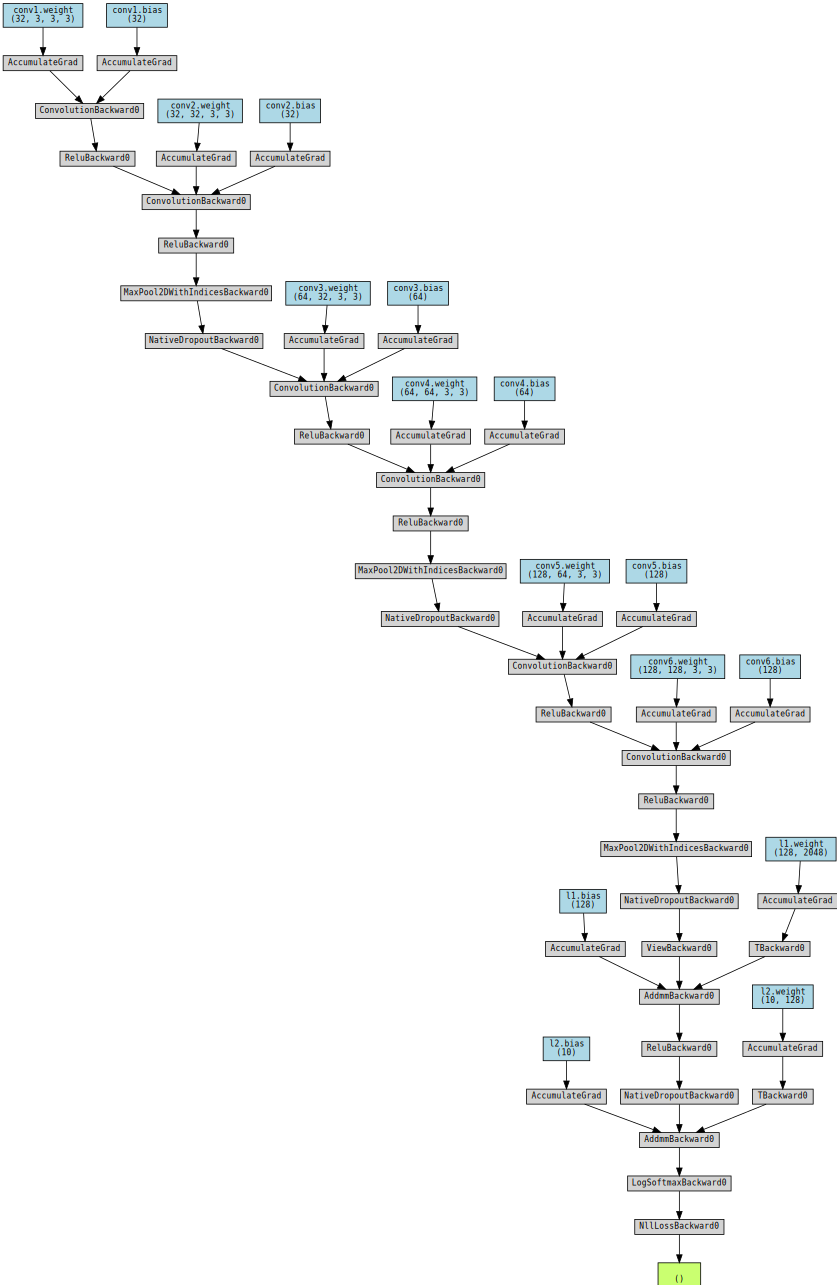

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 1.70854 acc: 0.36412 val_loss: 1.31135, val_acc: 0.51440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 1.29950 acc: 0.52684 val_loss: 1.08673, val_acc: 0.60440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 1.13544 acc: 0.59324 val_loss: 1.02499, val_acc: 0.63500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 1.01047 acc: 0.64056 val_loss: 0.86060, val_acc: 0.69560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.91939 acc: 0.67534 val_loss: 0.78258, val_acc: 0.72610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.85431 acc: 0.70178 val_loss: 0.76897, val_acc: 0.72770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.80255 acc: 0.72106 val_loss: 0.72219, val_acc: 0.75010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.75992 acc: 0.73824 val_loss: 0.72297, val_acc: 0.75180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.72506 acc: 0.74920 val_loss: 0.65581, val_acc: 0.77630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.68911 acc: 0.76136 val_loss: 0.65012, val_acc: 0.77420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.67363 acc: 0.76812 val_loss: 0.69361, val_acc: 0.76300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.64941 acc: 0.77466 val_loss: 0.62933, val_acc: 0.78630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.63410 acc: 0.78056 val_loss: 0.61007, val_acc: 0.79450


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.60924 acc: 0.78866 val_loss: 0.61448, val_acc: 0.79320


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.60021 acc: 0.79258 val_loss: 0.60293, val_acc: 0.79330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.58746 acc: 0.79752 val_loss: 0.58056, val_acc: 0.80380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.57377 acc: 0.80102 val_loss: 0.59064, val_acc: 0.80290


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.55695 acc: 0.80576 val_loss: 0.56810, val_acc: 0.80990


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.54937 acc: 0.80894 val_loss: 0.56035, val_acc: 0.81190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.54596 acc: 0.81120 val_loss: 0.57395, val_acc: 0.80720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.52937 acc: 0.81604 val_loss: 0.55440, val_acc: 0.81650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.51923 acc: 0.82080 val_loss: 0.59400, val_acc: 0.80660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.51609 acc: 0.82086 val_loss: 0.57111, val_acc: 0.81200


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.51365 acc: 0.81998 val_loss: 0.55409, val_acc: 0.81310


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.50177 acc: 0.82662 val_loss: 0.54960, val_acc: 0.81600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.49590 acc: 0.82716 val_loss: 0.56590, val_acc: 0.81230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.48762 acc: 0.83056 val_loss: 0.56401, val_acc: 0.81590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.48075 acc: 0.83244 val_loss: 0.55262, val_acc: 0.81970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.47897 acc: 0.83370 val_loss: 0.55156, val_acc: 0.81920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.46890 acc: 0.83692 val_loss: 0.53193, val_acc: 0.82520


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.46622 acc: 0.83990 val_loss: 0.54665, val_acc: 0.82360


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.46480 acc: 0.83884 val_loss: 0.54220, val_acc: 0.82220


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.45945 acc: 0.83844 val_loss: 0.53996, val_acc: 0.82380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.45001 acc: 0.84498 val_loss: 0.52319, val_acc: 0.82840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.45067 acc: 0.84412 val_loss: 0.53629, val_acc: 0.82560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.44528 acc: 0.84500 val_loss: 0.54817, val_acc: 0.82330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.43961 acc: 0.84780 val_loss: 0.56818, val_acc: 0.82240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.43839 acc: 0.84674 val_loss: 0.54169, val_acc: 0.82470


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.44266 acc: 0.84642 val_loss: 0.57249, val_acc: 0.81850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.43229 acc: 0.85076 val_loss: 0.53398, val_acc: 0.82910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.43127 acc: 0.85170 val_loss: 0.52464, val_acc: 0.82910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.43059 acc: 0.85202 val_loss: 0.54068, val_acc: 0.82370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.42227 acc: 0.85158 val_loss: 0.52707, val_acc: 0.82940


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.41647 acc: 0.85502 val_loss: 0.54793, val_acc: 0.82710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.41710 acc: 0.85450 val_loss: 0.52679, val_acc: 0.83570


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.41948 acc: 0.85406 val_loss: 0.53239, val_acc: 0.83180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.41057 acc: 0.85766 val_loss: 0.52741, val_acc: 0.83230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.40522 acc: 0.85972 val_loss: 0.55029, val_acc: 0.83320


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.40764 acc: 0.85832 val_loss: 0.53524, val_acc: 0.83090


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.40649 acc: 0.85780 val_loss: 0.55136, val_acc: 0.83270
初期状態: 損失: 1.31135 精度: 0.51440
最終状態: 損失: 0.55136 精度: 0.83270


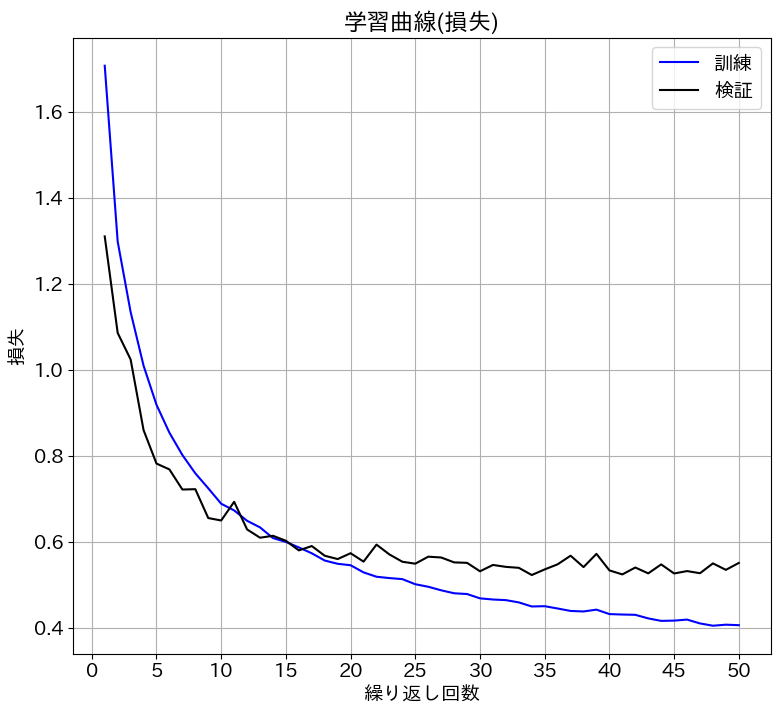

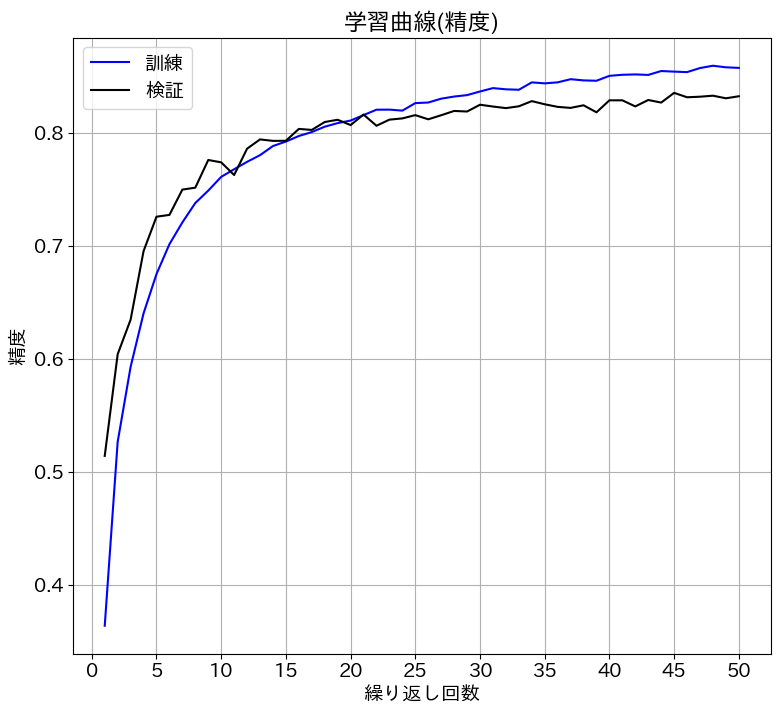

In [5]:
net = CNN_v3(n_output).to(device)
criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

torch_seed()

net = CNN_v3(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

evaluate_history(history)

In [6]:
class CNN_v4(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn6 = nn.BatchNorm2d(128)

        self.features = nn.Sequential(
            self.conv1,
            self.bn1,
            self.relu,
            self.conv2,
            self.bn2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn3,
            self.relu,
            self.conv4,
            self.bn4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn5,
            self.relu,
            self.conv6,
            self.bn6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [7]:
torch_seed()

net = CNN_v4(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0, 5))

num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 1.50815 acc: 0.44312 val_loss: 1.17889, val_acc: 0.57190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 1.12509 acc: 0.60008 val_loss: 1.27701, val_acc: 0.57060


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.97401 acc: 0.65864 val_loss: 0.86860, val_acc: 0.69810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.88729 acc: 0.68954 val_loss: 0.74958, val_acc: 0.73120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.82240 acc: 0.71592 val_loss: 0.67530, val_acc: 0.76550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.77217 acc: 0.73558 val_loss: 0.66370, val_acc: 0.77160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.73368 acc: 0.75086 val_loss: 0.60385, val_acc: 0.79120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.69179 acc: 0.76390 val_loss: 0.67555, val_acc: 0.76970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.66180 acc: 0.77664 val_loss: 0.63457, val_acc: 0.79150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.62457 acc: 0.78838 val_loss: 0.54923, val_acc: 0.80930


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.60227 acc: 0.79802 val_loss: 0.53537, val_acc: 0.82100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.57779 acc: 0.80592 val_loss: 0.56179, val_acc: 0.80840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.55294 acc: 0.81352 val_loss: 0.50713, val_acc: 0.83000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.53506 acc: 0.82096 val_loss: 0.54216, val_acc: 0.81810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.51463 acc: 0.82830 val_loss: 0.49724, val_acc: 0.83270


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.50348 acc: 0.83142 val_loss: 0.47715, val_acc: 0.83980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.48310 acc: 0.83820 val_loss: 0.50626, val_acc: 0.83450


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.47005 acc: 0.84204 val_loss: 0.46659, val_acc: 0.84300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.45709 acc: 0.84592 val_loss: 0.47734, val_acc: 0.84350


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.44329 acc: 0.85012 val_loss: 0.45659, val_acc: 0.85060


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.42591 acc: 0.85686 val_loss: 0.48095, val_acc: 0.84570


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.42007 acc: 0.85808 val_loss: 0.45329, val_acc: 0.85020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.40784 acc: 0.86412 val_loss: 0.44873, val_acc: 0.85280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.39767 acc: 0.86520 val_loss: 0.48771, val_acc: 0.84580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.38770 acc: 0.86934 val_loss: 0.46526, val_acc: 0.85020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.38454 acc: 0.87096 val_loss: 0.45960, val_acc: 0.85470


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.37389 acc: 0.87334 val_loss: 0.47383, val_acc: 0.85150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.36536 acc: 0.87676 val_loss: 0.46007, val_acc: 0.85240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.35632 acc: 0.87830 val_loss: 0.46714, val_acc: 0.85380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.35099 acc: 0.88168 val_loss: 0.43666, val_acc: 0.86150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.34098 acc: 0.88522 val_loss: 0.46169, val_acc: 0.85830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.33381 acc: 0.88684 val_loss: 0.46030, val_acc: 0.86190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.33296 acc: 0.88650 val_loss: 0.43166, val_acc: 0.86380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.32239 acc: 0.89160 val_loss: 0.44136, val_acc: 0.86340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.31879 acc: 0.89244 val_loss: 0.43823, val_acc: 0.86500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.30855 acc: 0.89560 val_loss: 0.44815, val_acc: 0.86240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.30361 acc: 0.89646 val_loss: 0.44997, val_acc: 0.86210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.30154 acc: 0.89720 val_loss: 0.45320, val_acc: 0.86150


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.29910 acc: 0.89840 val_loss: 0.44420, val_acc: 0.86070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.29075 acc: 0.90164 val_loss: 0.43897, val_acc: 0.86280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.27984 acc: 0.90498 val_loss: 0.46998, val_acc: 0.86500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.27969 acc: 0.90408 val_loss: 0.44451, val_acc: 0.86820


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.27531 acc: 0.90524 val_loss: 0.43369, val_acc: 0.86630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.27804 acc: 0.90630 val_loss: 0.46293, val_acc: 0.86470


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.26520 acc: 0.91000 val_loss: 0.44438, val_acc: 0.86980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.26300 acc: 0.91052 val_loss: 0.45835, val_acc: 0.86410


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.25874 acc: 0.91002 val_loss: 0.43838, val_acc: 0.86680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.25528 acc: 0.91234 val_loss: 0.43614, val_acc: 0.87090


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.25711 acc: 0.91236 val_loss: 0.45670, val_acc: 0.86910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.24791 acc: 0.91498 val_loss: 0.45630, val_acc: 0.86660


images shape:  torch.Size([100, 3, 32, 32])
labels shape:  torch.Size([100])
loss:  0.4792234003543854


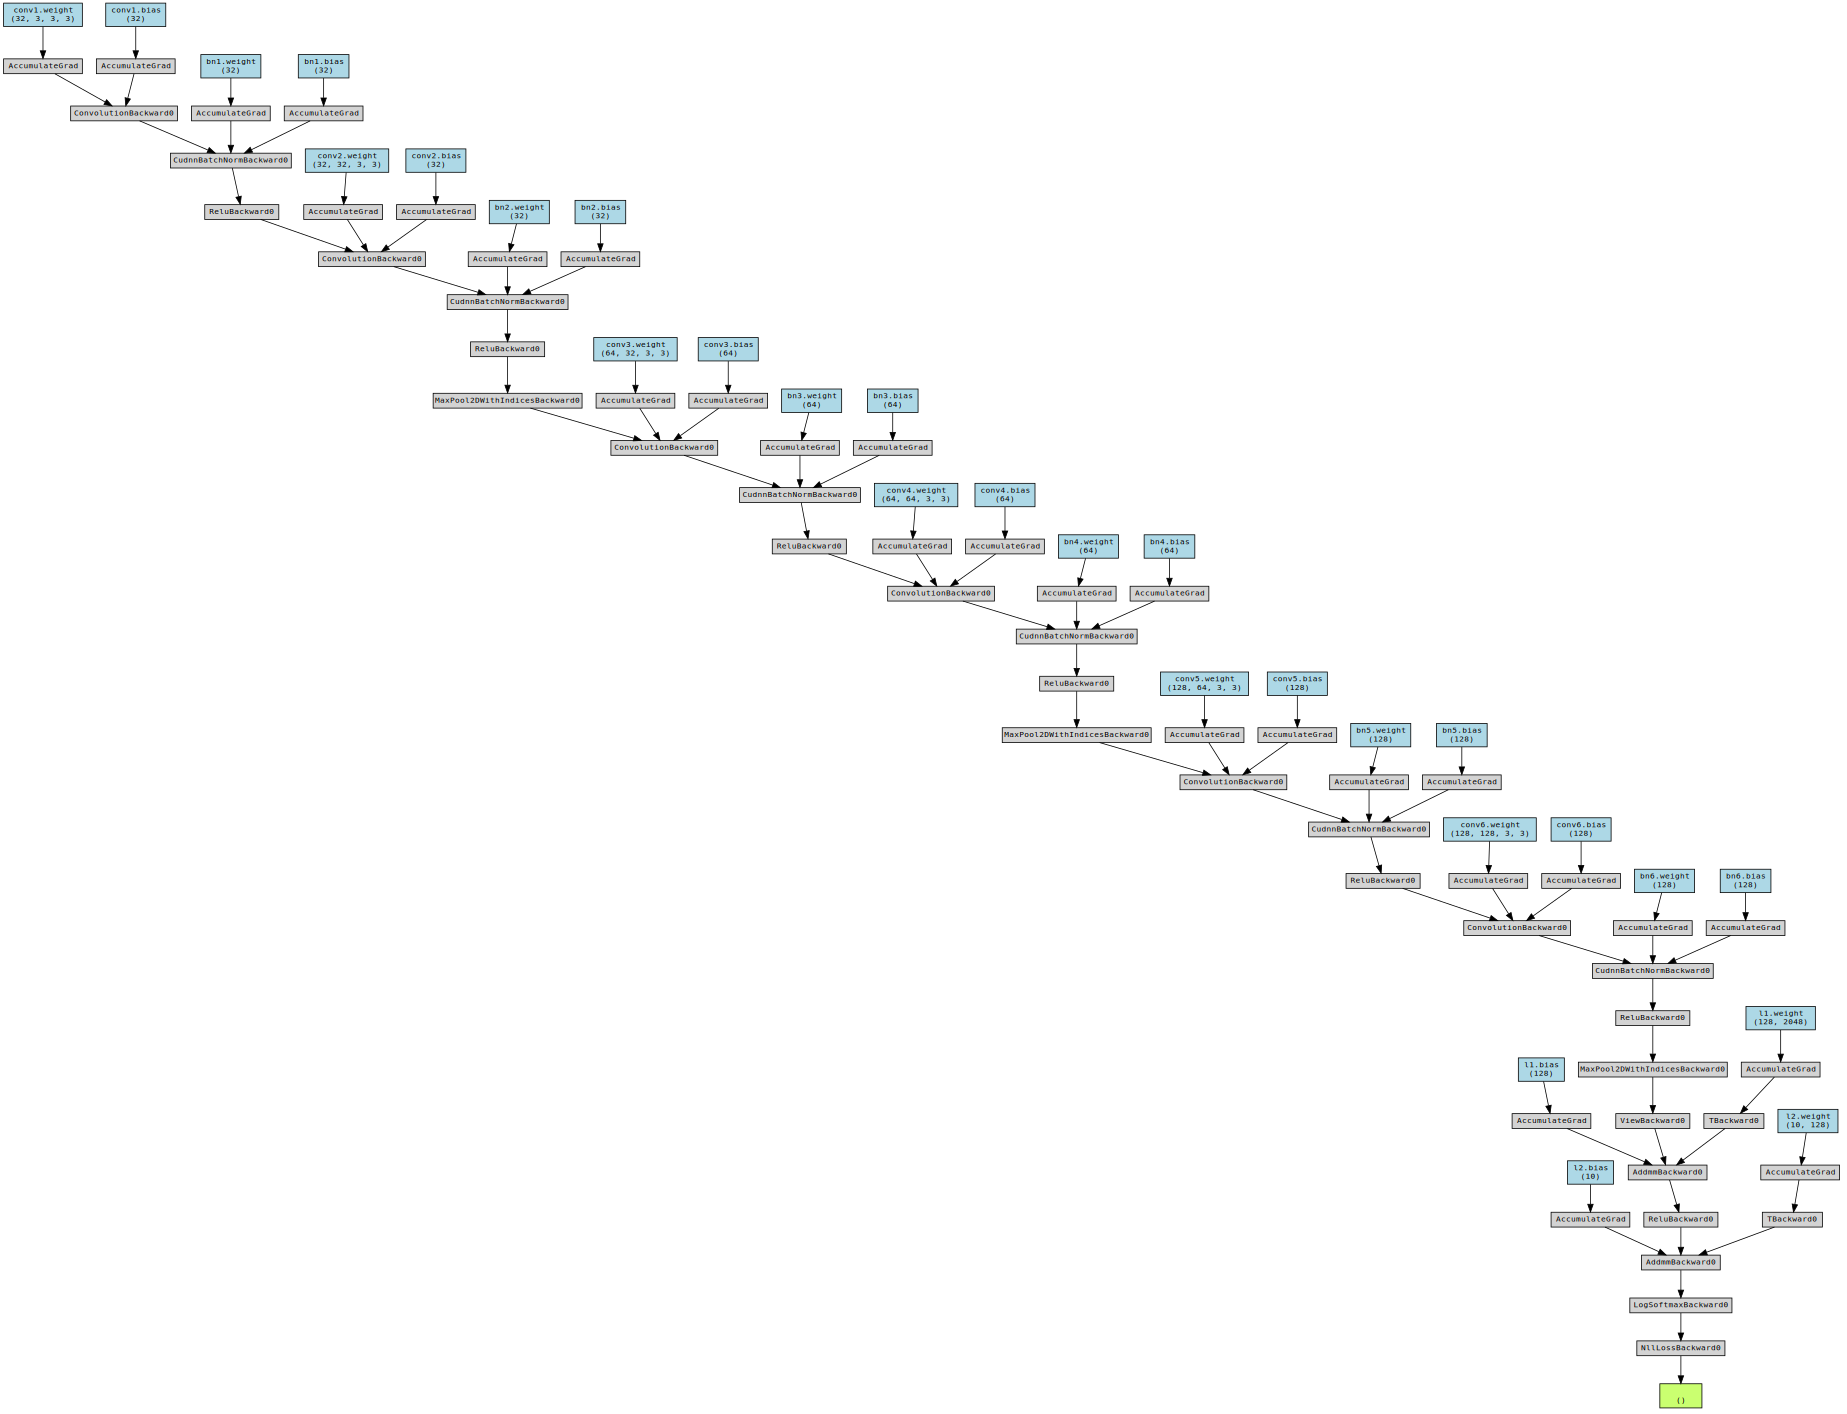

In [8]:
images, labels = next(iter(test_loader))
print("images shape: ", images.shape)
print("labels shape: ", labels.shape)

images = images.to(device)
labels = labels.to(device)

outputs = net(images)

loss = criterion(outputs, labels)
print("loss: ", loss.item())

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)